In [ ]:
!unzip drive/MyDrive/default+of+credit+card+clients.zip -d data

Archive:  drive/MyDrive/default+of+credit+card+clients.zip
 extracting: data/default of credit card clients.xls  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_excel('/content/data/default of credit card clients.xls', skiprows=1)

In [ ]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
17684,17685,50000,2,3,1,35,0,0,0,0,...,49564,28609,28302,2300,3000,2503,1500,1204,2000,0
20019,20020,280000,2,1,2,30,0,0,0,0,...,202919,197380,201927,9300,9500,9509,7100,7800,8200,0
11794,11795,10000,1,2,2,42,1,2,0,0,...,4838,10096,10112,1000,1517,194,6700,1000,1500,1
28598,28599,220000,2,1,1,38,1,2,2,0,...,176859,182393,187446,10000,0,8000,10000,8000,12000,0
3873,3874,50000,1,3,1,52,1,2,0,0,...,23806,16818,14438,0,6900,0,0,0,0,1
8789,8790,500000,1,1,1,51,0,0,0,0,...,243132,243869,251540,15000,15006,10000,10000,12000,15000,0
11019,11020,360000,2,2,1,37,-1,0,0,0,...,1266,1212,1324,1002,1002,202,501,502,501,1
23267,23268,80000,2,2,2,40,0,0,0,0,...,82456,82854,80868,3200,4300,3340,3500,2999,3300,0
23804,23805,80000,2,3,1,50,0,0,0,-1,...,773,-5857,57071,5012,7450,5000,1630,69794,15000,0
51,52,100000,2,3,3,43,0,0,0,0,...,39619,35762,33258,2000,1606,1500,2000,1500,1000,0


<Axes: >

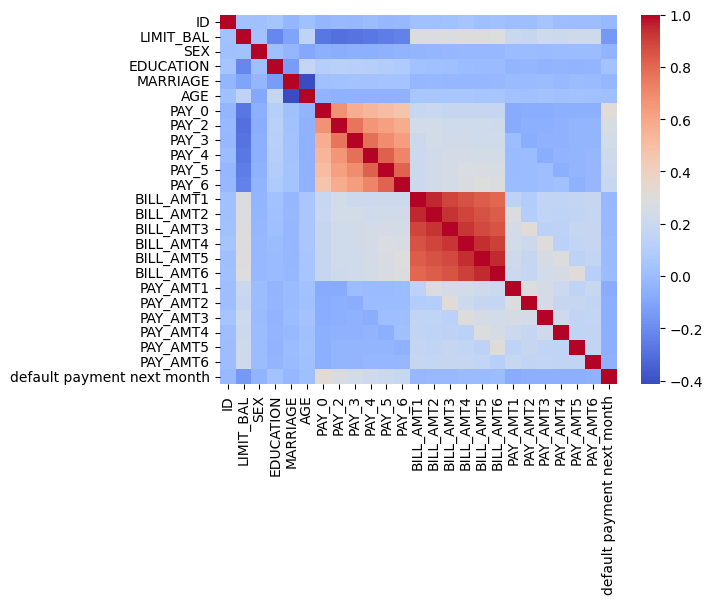

In [ ]:

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
scaller = StandardScaler()
columns_for_normalize = ["LIMIT_BAL", "AGE", 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

df_norm = df.copy()
df_norm[columns_for_normalize] = scaller.fit_transform(df[columns_for_normalize])
df_norm = df_norm.loc[:, df_norm.columns != "ID"]
df_target = df.loc[:, df.columns == "default payment next month"]

In [ ]:
feautures = ["LIMIT_BAL", 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', "PAY_4", "BILL_AMT4", 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
df_norm.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
19583,1.483795,2,2,1,0.055816,0,0,0,0,0,...,0.078407,-0.450578,-0.444927,-0.160815,-0.170186,1.354789,-0.240017,-0.248683,-0.237130,0
5087,-0.905498,2,1,2,-0.486615,0,0,0,0,0,...,-0.161925,-0.111461,-0.078430,-0.221191,-0.190411,-0.230065,-0.230314,-0.234021,-0.221323,0
6450,-0.905498,2,2,1,-1.354506,0,0,0,0,0,...,-0.231253,-0.196565,-0.175016,-0.039340,-0.126784,-0.095287,-0.148480,-0.183229,-0.180878,0
23681,1.792091,2,2,1,1.140680,0,0,0,0,0,...,-0.052166,-0.086361,-0.048742,0.563691,0.394038,0.271165,0.649431,0.994931,0.831656,0
17615,1.483795,2,2,1,-0.269643,0,0,0,0,0,...,0.219348,0.010718,1.032645,1.469324,0.178895,0.843278,1.606925,5.576668,-0.240055,0
11223,0.250611,2,2,2,-0.812074,0,0,0,0,0,...,0.366429,0.461848,0.519339,-0.160815,-0.126784,-0.154810,-0.140054,-0.137412,-0.096500,0
6720,1.021351,2,1,2,-1.029047,0,0,0,0,0,...,3.221192,3.454917,3.545041,0.865931,0.133627,0.271165,0.266434,0.340398,0.156633,0
29089,1.483795,2,2,2,1.683111,1,-1,-1,-1,-1,...,-0.517924,-0.588383,-0.517987,0.595569,-0.163893,0.267985,-0.018261,0.211062,-0.044692,0
9211,1.792091,1,1,2,-0.812074,-2,-2,-2,-2,-2,...,-0.457145,-0.435084,-0.447613,-0.341942,-0.130820,0.490571,0.577236,0.485442,1.347543,0
14289,2.562830,2,2,1,0.164303,0,0,0,0,0,...,2.462112,2.674949,2.741490,0.247022,0.064792,0.097368,0.157854,0.210865,0.797005,0


In [ ]:
def library_calculation(data):
    X = data.loc[:, data.columns != "default payment next month"]
    y = data["default payment next month"]

    dtree = DecisionTreeClassifier(random_state=42)
    dtree.fit(X, y)

    importances = dtree.feature_importances_

    imp_df = pd.DataFrame({"Feature" : X.columns, "Importance" : importances})
    imp_df = imp_df.sort_values(by="Importance", ascending=False)
    return imp_df

In [ ]:
library_calculation(df_norm)

,Feature,Importance
5,PAY_0,0.162448
4,AGE,0.070946
11,BILL_AMT1,0.069154
0,LIMIT_BAL,0.060820
16,BILL_AMT6,0.053584
12,BILL_AMT2,0.053103
19,PAY_AMT3,0.052369
17,PAY_AMT1,0.051592
13,BILL_AMT3,0.047721
21,PAY_AMT5,0.047273


In [ ]:
def calculate_gain_ratio(X, y):

    def entropy(target):
        _, counts = np.unique(target, return_counts=True)
        probabilities = counts / len(target)
        return -np.sum(probabilities * np.log2(probabilities + 1e-10))  # +1e-10 чтобы избежать деления на ноль

    X = X.loc[:, X.columns != "default payment next month"]
    gain_ratios = {}
    H_T = entropy(y)

    for feature in X.columns:
        feature_values = X[feature]
        H_T_given_A = 0
        IV = 0

        for value in np.unique(feature_values):
            subset_indices = feature_values == value
            subset_y = y[subset_indices]
            subset_size = len(subset_y)

            if subset_size == 0:
                continue

            H_T_given_A += (subset_size / len(y)) * entropy(subset_y)

            prob = subset_size / len(y)
            IV -= prob * np.log2(prob + 1e-10)

        IG = H_T - H_T_given_A

        if IV == 0:
            gain_ratio = 0
        else:
            gain_ratio = IG / IV

        gain_ratios[feature] = gain_ratio

    return gain_ratios

In [ ]:
gain_ratios = calculate_gain_ratio(df_norm, df_target)
gain_ratio_df = pd.DataFrame({'Feature': gain_ratios.keys(), 'Gain Ratio': gain_ratios.values()})
gain_ratio_df = gain_ratio_df.sort_values(by='Gain Ratio', ascending=False)
gain_ratio_df

,Feature,Gain Ratio
5,PAY_0,0.052938
11,BILL_AMT1,0.042872
12,BILL_AMT2,0.042842
13,BILL_AMT3,0.042804
14,BILL_AMT4,0.042457
15,BILL_AMT5,0.041936
16,BILL_AMT6,0.041801
6,PAY_2,0.038402
7,PAY_3,0.029459
8,PAY_4,0.026760
